In [74]:
# imports
from gesla import GeslaDataset

In [75]:
meta_file = "../data-prep/data/GESLA3_ALL.csv"
data_path = "/mnt/e/GESLA data/"

g3 = GeslaDataset(meta_file=meta_file, data_path=data_path)

In [76]:
filename = "arecibo-9757809-usa-noaa"
data, meta = g3.file_to_pandas(filename)

years = {}
levels = []

drop = []
data = data.reset_index()
data = data.drop(["qc_flag","use_flag"], axis=1)

sum = 0
for indx, row in data.iterrows():
    if row['sea_level'] < -99:
        drop.append(indx)
    else:
        year = row["date_time"].year
        if year not in years:
            years[year] = 1
            # get average of sum
            levels.append(sum/(entries if entries != 0 else 1))

            # resets
            sum = 0
    
        #continue to add to sum
        sum += row["sea_level"]
        years[year] += 1

In [70]:
levels

[0.0,
 7.0778261594928304,
 6.980923861942446,
 7.040097836774825,
 7.0226627920358995,
 7.073094711648089,
 7.0241844938158655,
 7.081209235027683,
 7.09730170352662,
 7.0743278367158595]

<AxesSubplot:xlabel='date_time'>

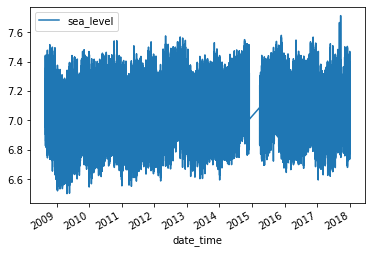

In [62]:
plt.pyplot(data)

In [73]:
meta.null_value

-99.9999